<a href="https://colab.research.google.com/github/jimmycool/google-colab/blob/master/Copy_of_Copy_of_Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os
img_fold=os.listdir('/content/drive/MyDrive/PH2')
images=[]
images_seg=[]
import cv2 as cv
print(len(img_fold))
for i in range(0,len(img_fold)):
    print(i) 
    images.append(cv.resize(cv.imread("/content/drive/MyDrive/PH2"+"/"+img_fold[i]+"/"+img_fold[i]+"_Dermoscopic_Image"+"/"+img_fold[i]+".bmp"),(512,512)))
    images_seg.append(cv.resize(cv.imread("/content/drive/MyDrive/PH2"+"/"+img_fold[i]+"/"+img_fold[i]+"_lesion/"+img_fold[i]+"_lesion"+".bmp"),(512,512)))
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [2]:
import cv2 as cv
import numpy as np
import os
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, images_seg, test_size=0.10, random_state=42)
print(X_train[0].shape)
print(y_train[0].shape)

(512, 512, 3)
(512, 512, 3)


In [3]:
import keras
import keras.layers
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D
model=Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(512,512,3)))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((1, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((1, 2)))
model.add(Conv2D(3, (1, 1), activation='softmax', padding='same'))
#model.compile(optimizer='adam',loss='binary_crossentropy')
#model.fit(np.array(X_train),np.array(X_train),epochs=1)
model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['Precision'])
model.fit(np.array(X_train),np.array(y_train),epochs=100,validation_data=(np.array(X_test),np.array(y_test)))

Epoch 1/100
6/6 [==============================] - 69s 11s/step - loss: 78.9071 - precision: 0.3120 - val_loss: 95.7722 - val_precision: 0.3787
Epoch 2/100
6/6 [==============================] - 66s 11s/step - loss: 83.0068 - precision: 0.3282 - val_loss: 95.7722 - val_precision: 0.3787
Epoch 3/100
6/6 [==============================] - 66s 11s/step - loss: 74.9643 - precision: 0.2966 - val_loss: 95.7722 - val_precision: 0.3787
Epoch 4/100
6/6 [==============================] - 66s 11s/step - loss: 80.1002 - precision: 0.3167 - val_loss: 95.7722 - val_precision: 0.3787
Epoch 5/100


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
def dice(pred, true, k = 1):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(0,571):
        for j in range(0,571):
                if(true[i][j][0]>0 and (pred[i][j][0]==255)):
                    tp+=1
                elif(pred[i][j][0]==0 and true[i][j][0]==0):
                    tn+=1
                elif(pred[i][j][0]==0 and true[i][j][0]>0):
                    fp+=1
                elif(pred[i][j][0]==255 and true[i][j][0]==0):
                    fn+=1    
    return (((tp)/(fp+tp)),tn/(tn+fn),(2*tp/(2*tp+fp+fn)))

dict_keys(['loss', 'precision', 'val_loss', 'val_precision'])


Text(0, 0.5, 'loss')

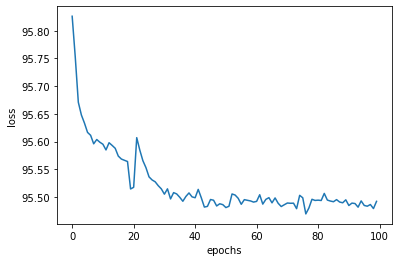

In [ ]:
512*512*3*22
print(model.history.history.keys())
#plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')



Text(0, 0.5, 'precision')

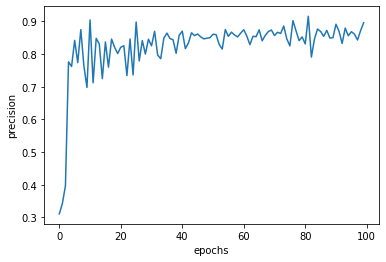

In [ ]:
plt.plot(model.history.history['precision'])
plt.xlabel('epochs')
plt.ylabel('precision')

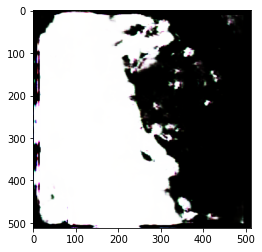

In [ ]:
#X=model.predict(np.array(X_test))
import matplotlib.pyplot as plt
df=np.array(X[1]).reshape(512,512,3)
plt.imshow(df)

In [ ]:
print(model.history.history.keys())

dict_keys([])


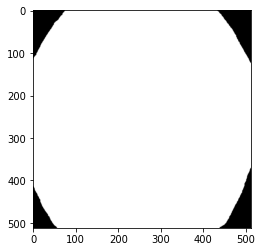

In [ ]:
plt.imshow(y_test[1].reshape(512,512,3))

In [ ]:
print(dice_coef(y_test[18],df))

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os
img_fold=os.listdir('/content/drive/MyDrive/PH2')
images=[]
images_seg=[]
import cv2 as cv
for i in range(0,len(img_fold)):
    images.append(cv.imread("/content/drive/MyDrive/PH2"+"/"+img_fold[i]+"_Dermoscopic_Image"+"/"+img_fold[i]+".bmp",cv.COLOR_RGB2HSV))
    images_seg.append(cv.imread("/content/drive/MyDrive/PH2"+"/"+img_fold[i]+"_lesion/"+img_fold[i]+"_lesion"+".bmp",cv.COLOR_RGB2HSV))
import matplotlib.pyplot as plt
import numpy as np
print(images[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
None
